<a href="https://colab.research.google.com/github/phatk/portfolio/blob/master/mpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#!pip install pyportfolioopt
#!pip install zipline
#!pip install pulp

     |████████████████████████████████| 40.6MB 94kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for amply: filename=amply-0.1.2-cp36-none-any.whl size=16572 sha256=0774bfdd0be314ad55af412145de9e8ee0b4dbbc5fc1ea0d75e82b6efbc1c6f1
  Stored in directory: /root/.cache/pip/wheels/84/18/f7/e5c3ed13ed5bb721763f77d4a924331d59ef115ce61c9d26eb
Successfully built amply


In [ ]:
#from zipline.api import (symbols, record, order_target_percent, 
#                         schedule_function, date_rules, time_rules)
#from zipline.finance import commission

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
df = pd.read_csv('jitta_price.csv')
df.columns = ['time', 'AEONTS', 'BEAUTY', 'COM7', 'PTTEP', 'TCAP']
df.head()

,time,AEONTS,BEAUTY,COM7,PTTEP,TCAP
0,2019-02-25,184.0,8.20,18.0,127.5,53.25
1,2019-02-26,182.5,6.95,17.6,125.0,53.25
2,2019-02-27,179.5,6.75,17.9,126.5,56.25
3,2019-02-28,179.5,6.85,17.9,124.5,55.75
4,2019-03-01,180.0,6.65,18.1,123.5,54.25


In [ ]:
# There is an error for the prices of stocks on date on 2019-06-06 where all of them drop to 0.
# Hence, we want to remove that point. 
#df.iloc[66]
df = df.drop(index=66)

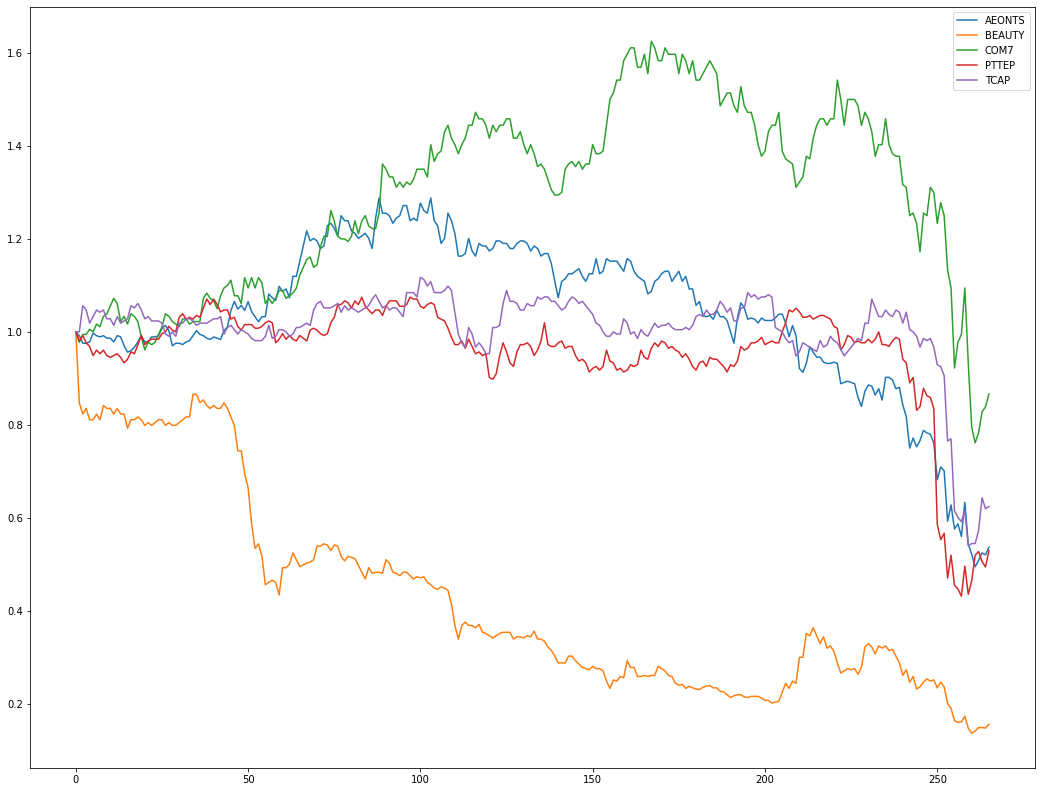

In [ ]:
# I want to normalize the data for comparison
stocks = df[["AEONTS", "BEAUTY", "COM7", "PTTEP", "TCAP"]]
first = stocks.iloc[0]
(stocks/first).plot(figsize=(18,14))

In [ ]:
# Volatility is the squared root of variance. 
stocks.std()

# Hence, BEAUTY is the least volatile stock that has a value for volatility as 1.78. 

# I'm comparing their annualized volatility
#stocks.std() * (255 ** 0.5)

AEONTS    30.749970
BEAUTY     1.780628
COM7       3.639958
PTTEP     15.970394
TCAP       5.136027
dtype: float64

In [ ]:
avg_returns = expected_returns.mean_historical_return(stocks)
cov_mat = risk_models.sample_cov(stocks)
print(avg_returns)
print(cov_mat)

AEONTS   -0.502952
BEAUTY   -1.503913
COM7     -0.032205
PTTEP    -0.463293
TCAP     -0.366459
dtype: float64
          AEONTS    BEAUTY      COM7     PTTEP      TCAP
AEONTS  0.177143  0.106319  0.097967  0.115510  0.083748
BEAUTY  0.106319  0.529373  0.111716  0.117615  0.095680
COM7    0.097967  0.111716  0.203050  0.071547  0.086066
PTTEP   0.115510  0.117615  0.071547  0.263003  0.089133
TCAP    0.083748  0.095680  0.086066  0.089133  0.157493


In [ ]:
# get weights maximizing the Sharpe ratio
ef = EfficientFrontier(avg_returns, cov_mat)

weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)

ef.portfolio_performance(verbose=True)

# submit orders
#for asset in stocks:
#    order_target_percent(asset, stocks[asset])

#record(weights=cleaned_weights)

OrderedDict([('AEONTS', 0.24079), ('BEAUTY', 0.02144), ('COM7', 0.224), ('PTTEP', 0.12491), ('TCAP', 0.38887)])
Expected annual return: -36.1%
Annual volatility: 33.7%
Sharpe Ratio: -1.13


(-0.36093560559700355, 0.33745043250652396, -1.1288638831116)

In [40]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(stocks)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: {:.2f} baht".format(leftover))

Discrete allocation: {'AEONTS': 2438.0, 'BEAUTY': 16750.0, 'COM7': 14359.0, 'PTTEP': 1851.0, 'TCAP': 11695.0}
Funds remaining: 5.85 baht
